
This notebook will run through example analyses using shapefiles.  There are three, the first uses some nursing home data I found a long time ago (used with QGIS in OCN-363 many years ago).  The next two are perhaps more relevant and come from Brian Tibbetts' GitHub (https://github.com/BrianTibbetts/GIS-Independent-Study?tab=readme-ov-file)

The examples need data as follows:
  1. The NYC one
     1. nybb.* shapefile
     2. population.dat CSV file
  2. The NOAA heat map needs climate data from PSL and NCEI:
     1. GIS.OFFICIAL_CLIM_DIVISIONS shape file (https://psl.noaa.gov/data/usclimdivs/boundaries.html)
     2. temperature data, e.g., 110-tavg-189606-12.csv (https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00005)
  3. The EPA air quality
     1. cb_2016_us_state_20m.zip shapefile from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2014.html
     2. polution air data (Facility Air Pollution Dataset - All Facilities.csv) from 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Example 1: Nursing homes in New York
Here we look at the relationship between population (as CSV) and shapefile with bourough boundaries.

In [3]:
# read the two input files, one as shapefile (geopandas), 
# the other as DataFrame
shape = './data/nybb.shp'
map_df = gpd.read_file(shape)

pop = './data/population.dat'
df = pd.read_csv(pop,header=0)

<Axes: >

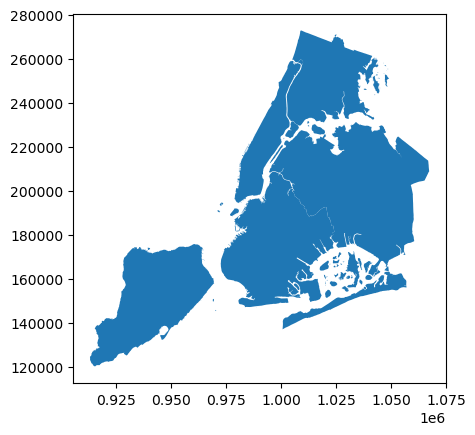

In [4]:
# quick look at map
map_df.plot()

In [5]:
# Merge, or spacially join the two using Borough (different names)
merged = map_df.set_index('BoroName').join(df.set_index('Borough'))

In [6]:
# have a look at merged data set
merged.head()

,BoroCode,Shape_Leng,Shape_Area,geometry,County,Census,GDP,sqmile,sqkm,personpsqmile,personpsqkm
BoroName,,,,,,,,,,,
Staten Island,5,330454.806607,1.623847e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",Richmond,495747,14.514,57.5,148.9,8618,3327
Manhattan,1,357176.132581,6.363978e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",New York,1694251,600.244,22.7,58.8,74781,28872
Bronx,2,464475.067699,1.186824e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",Bronx,1472654,42.695,42.2,109.3,34920,13482
Brooklyn,3,742297.830402,1.937844e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",Kings,2736074,91.559,69.4,179.7,39438,15227
Queens,4,874225.139404,3.048479e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",Queens,2405464,93.310,108.7,281.5,22125,8542


/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/405827459.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm)


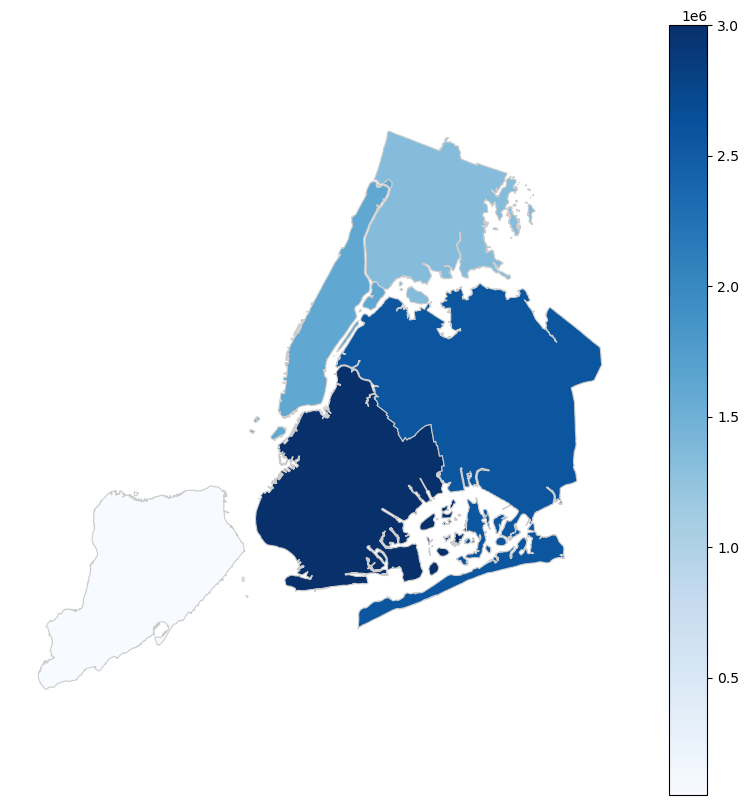

In [7]:
# make a figure plotting the number of people in each borough
fig, ax = plt.subplots(figsize=(10,10))
merged.plot(column='Census',cmap='Blues',ax=ax,linewidth=0.8,edgecolor='0.8')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=50000,vmax=3000000))
fig.colorbar(sm)

# Example 2: Make maps of heat by state
This will produce maps of the annual temperature anomaly for different years

In [8]:
# read in the states/climate divisions
fp = './data/GIS.OFFICIAL_CLIM_DIVISIONS.shp'
map_df = gpd.read_file(fp)
#map_df.head()

<Axes: >

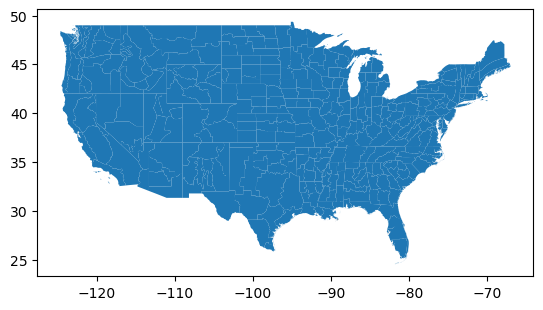

In [9]:
# make a quick plot
map_df.plot()

In [10]:
# load in data files from the NOAA to populate the map
df_1895 = pd.read_csv("./data/110-tavg-189606-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_1960 = pd.read_csv("./data/110-tavg-196006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_2010 = pd.read_csv("./data/110-tavg-201006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_2019 = pd.read_csv("./data/110-tavg-201906-12.csv", header=0, skiprows=4,on_bad_lines='warn')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/3444597767.py:2: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_1895 = pd.read_csv("./data/110-tavg-189606-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/3444597767.py:3: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_1960 = pd.read_csv("./data/110-tavg-196006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/3444597767.py:4: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_2010 = pd.read_csv("./data/110-tavg-201006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/3444597767.py:5: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_2019 = pd.read_csv("./data/110-tavg-201906-12.csv", header=0, skiprows=4,on_bad_lines='warn')


In [11]:
df_1895.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,101,Northern Valley,Alabama,60.2,0.2,65,59.9
1,102,Appalachian Mountain,Alabama,60.4,0.1,59,60.3
2,103,Upper Plains,Alabama,62.5,0.2,72,62.3
3,104,Eastern Valley,Alabama,61.3,-0.0,52,61.3
4,105,Piedmont Plateau,Alabama,62.0,0.2,71,61.8


In [12]:
# select only the columns that we want for the map
all_years_df = pd.concat([df_1895['ID'],
                          df_1895['Anomaly (1901-2000 base period)'],
                          df_1960['Anomaly (1901-2000 base period)'],
                          df_2010['Anomaly (1901-2000 base period)'],
                          df_2019['Anomaly (1901-2000 base period)']],
                         axis=1)
    
# rename the columns
all_years_df.columns = ['ID',
                        '1895 Average Annual Temperature Anomaly (°F)',
                        '1960 Average Annual Temperature Anomaly (°F)',
                        '2010 Average Annual Temperature Anomaly (°F)',
                        '2019 Average Annual Temperature Anomaly (°F)']

all_years_df.head()

,ID,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2010 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
0,101,0.2,-1.4,-1.1,1.8
1,102,0.1,-1.2,-1.0,1.9
2,103,0.2,-1.4,-1.3,1.6
3,104,-0.0,-1.0,-1.1,2.1
4,105,0.2,-0.9,-1.1,2.0


In [13]:
# join the GEOdataframe with the cleaned up csv data
merged = map_df.set_index('CLIMDIV').join(all_years_df.set_index('ID'))

merged.sort_values('CLIMDIV', ascending=False).head()

,OBJECTID,STATE,STATE_FIPS,CD_2DIG,STATE_CODE,CD_NEW,FIPS_CD,NCDC_GEO_I,NAME,ST_ABBRV,SHAPE_AREA,SHAPE_LEN,geometry,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2010 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
CLIMDIV,,,,,,,,,,,,,,,,,
4810,66,Wyoming,56,10,48,10,5610,320.0,UPPER PLATTE,WY,0.0,0.0,"POLYGON ((-107.33378 42.80068, -107.32835 42.7...",-2.1,0.1,-0.5,0.5
4809,68,Wyoming,56,09,48,9,5609,322.0,WIND RIVER,WY,0.0,0.0,"POLYGON ((-109.51581 43.93993, -109.50484 43.9...",-1.0,-0.1,-0.7,-0.1
4808,67,Wyoming,56,08,48,8,5608,321.0,LOWER PLATTE,WY,0.0,0.0,"POLYGON ((-106.52965 43.18177, -106.52644 43.1...",-0.9,-0.3,-0.6,-0.0
4807,64,Wyoming,56,07,48,7,5607,318.0,CHEYENNE & NIOBRARA DRAINAGE,WY,0.0,0.0,"POLYGON ((-104.28338 44.15419, -104.27634 44.1...",-1.5,-0.5,-0.7,-1.5
4806,63,Wyoming,56,06,48,6,5606,317.0,BELLE FOURCHE DRAINAGE,WY,0.0,0.0,"POLYGON ((-104.19334 44.99802, -104.17200 44.9...",-1.0,-0.6,-0.4,-1.7


In [14]:
list_of_years = ['1895', '1960', '2010', '2019']

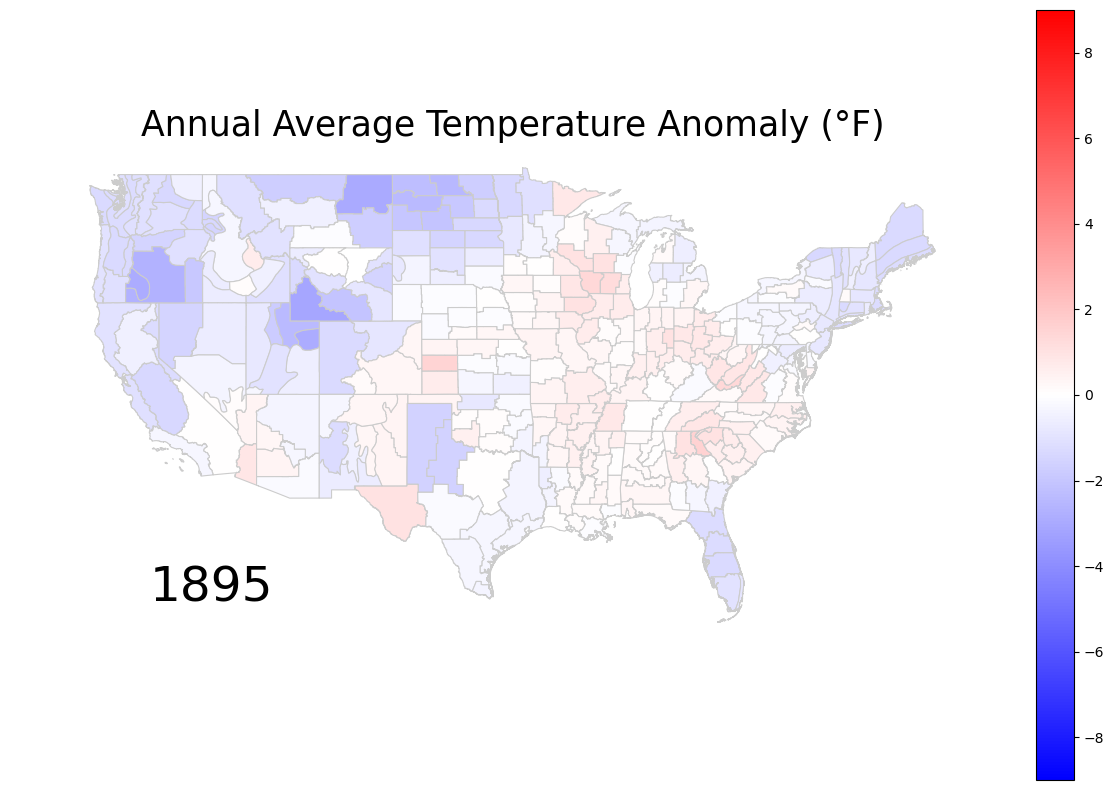

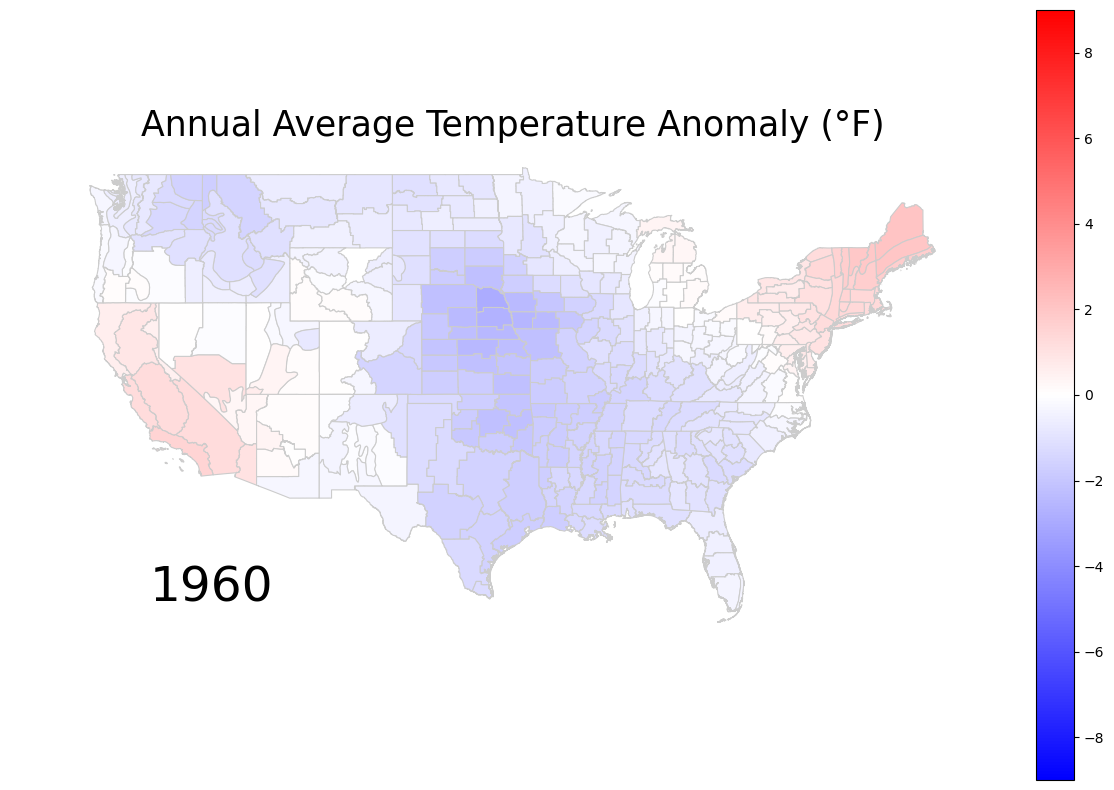

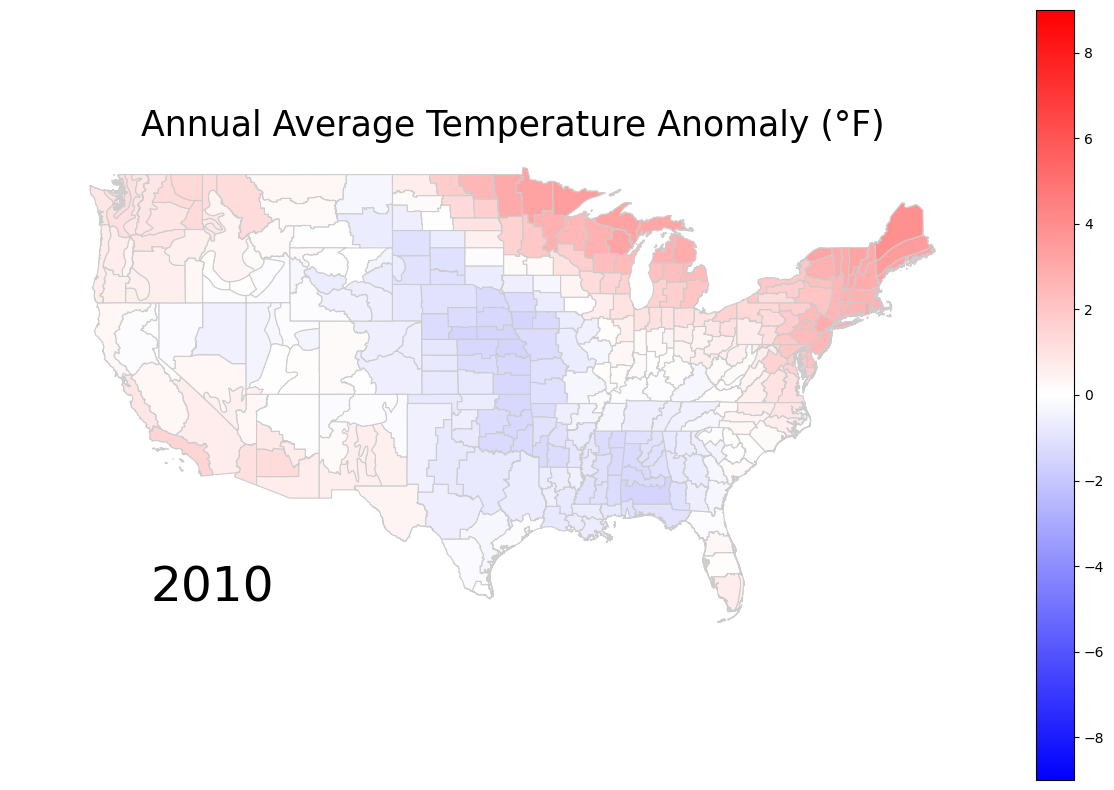

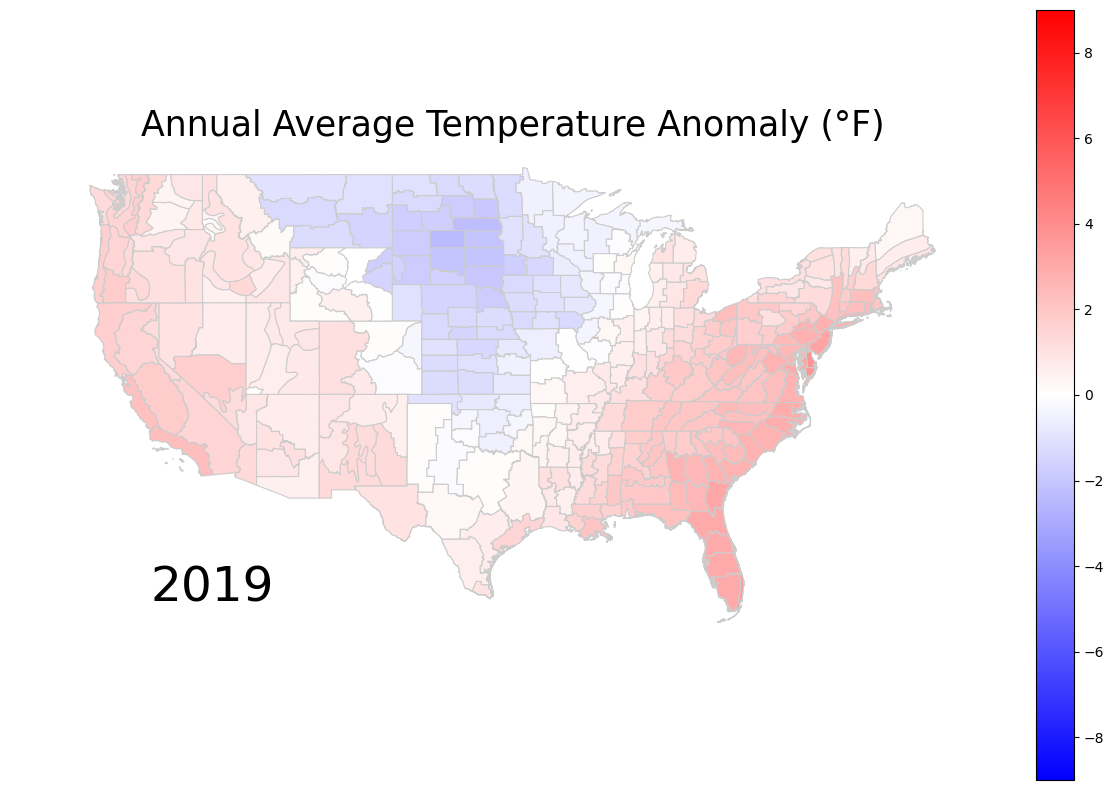

In [15]:
# set the range for the choropleth scale
vmin, vmax = -9, 9   # range for the choropleth color scale


for year in list_of_years:
    
    fig = merged.plot(column=year + ' Average Annual Temperature Anomaly (°F)',
                      cmap='bwr',
                      figsize=(15, 10),
                      linewidth=0.8,
                      edgecolor='0.8',
                      vmin=vmin,
                      vmax=vmax,
                      legend=True,
                      norm=plt.Normalize(vmin=vmin, vmax=vmax)) # plt.Normalize keeps the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Annual Average Temperature Anomaly (°F)', \
            fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # position an annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)



Some important observations from this map include:

-The increase in red sections up until 2019 point toward a general trend of warming.

-Temperature anomalies close to 0 seem more common in 1895 and 1960 than in 2019.

-2010 seems extraordinarily warm. It's the closest year to the top of the scale and helps to show the trend of accelerated climate change since 1960.

-Coastal climate zones nearly all experienced positive temperature anomalies in 2019.


# Example 3: Air quality

In [16]:
# set the filepath and load in the shapefile of US states
statesFile = "zip://data/cb_2016_us_state_20m.zip"
states_df = gpd.read_file(statesFile)
#states_df.head()

<Axes: >

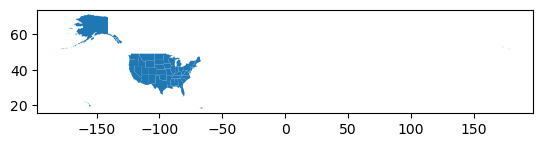

In [17]:
# make a quick plot
states_df.plot()

In [18]:
# Open up the pollution data file
pollution_df = pd.read_csv("./data/Facility Air Pollution Dataset - All Facilities.csv")

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/538396588.py:2: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  pollution_df = pd.read_csv("./data/Facility Air Pollution Dataset - All Facilities.csv")


In [19]:
pollution_df.head()

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,...,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
0,110002003153,TRIDENT SEAFOODS CORP AKUTAN SHORE PLANT,5513.0,3888.0,54.132189,-165.786894,1 SALMON LN,AKUTAN,AK,99553,...,NaN,99553TRDNTAKUTA,NaN,NaN,NaN,NaN,110002003153,NaN,NaN,NaN
1,110064064408,UNISEA INC SEAFOOD,NaN,5470.0,53.878858,-166.553496,88 SALMON WAY,DUTCH HARBOR,AK,996920008,...,NaN,99692NSNC POUCH,NaN,NaN,NaN,NaN,110064064408,NaN,NaN,NaN
2,110064048926,DUTCH HARBOR POWER PLANT,NaN,5208.0,53.892130,-166.533010,1732 EAST POINT RD,DUTCH HARBOR,AK,99692,...,NaN,NaN,NaN,NaN,NaN,NaN,110064048926,NaN,NaN,NaN
3,110000491735,FLINT HILLS RESOURCES ALASKA LLC ANCHORAGE TER...,3511.0,NaN,61.230110,-149.890900,1076 OCEAN DOCK RD,ANCHORAGE,AK,99501,...,NaN,99501MPCLS1076O,NaN,NaN,NaN,NaN,110000491735,NaN,NaN,NaN
4,110000498131,TESORO LOGISTICS GP LLC-ANCHOR AGE TERMINAL,5886.0,NaN,60.808079,-148.940007,1522 PORT RD,ANCHORAGE,AK,99501,...,NaN,99501TSRLS1522P,NaN,NaN,NaN,NaN,110000498131,NaN,NaN,NaN


In [20]:
# Remove values marked "Not reported" because they don't contribute to the sum

# Pandas has its own vectorized string operators, useful for operations on entire data columns or rows.
# ~ is a bitwise not operator.
# In this case it's being used to find any rows which don't contain the String "Not reported".
pollution_df = pollution_df[~pollution_df.GHG_Direct_Emissions_14_in_metric_tons.str.contains("Not reported")]

# Clean up the 2014 GHG emissions column by converting the values to integers
pollution_df['GHG_Direct_Emissions_14_in_metric_tons'] = pd.to_numeric(pollution_df['GHG_Direct_Emissions_14_in_metric_tons'])

In [21]:
# Start by making a pivot table to sum the total emissions by state
pollution_pivot = pd.pivot_table(
    data=pollution_df,
    values='GHG_Direct_Emissions_14_in_metric_tons',
    index=['State'],
    aggfunc=np.sum)

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_54422/988611237.py:2: FutureWarning: The provided callable <function sum at 0x10ea6fb00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pollution_pivot = pd.pivot_table(


In [22]:
# Check out which states had the most GHG emissions in 2014
pollution_pivot.sort_values(by='GHG_Direct_Emissions_14_in_metric_tons', ascending=False).head()

,GHG_Direct_Emissions_14_in_metric_tons
State,
TX,408071503
IN,159617422
OH,137737337
LA,137704495
PA,136820895


In [23]:
# join the GEOdataframe with the cleaned up GHG data
US_emissions_geo = states_df.set_index('STUSPS').join(pollution_pivot)

US_emissions_geo.sort_values(by='GHG_Direct_Emissions_14_in_metric_tons', ascending=False).head()

,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,GHG_Direct_Emissions_14_in_metric_tons
STUSPS,,,,,,,,,,
TX,48,01779801,0400000US48,48,Texas,00,676633459408,19025991684,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",408071503
IN,18,00448508,0400000US18,18,Indiana,00,92790545247,1536767065,"POLYGON ((-88.05947 37.86669, -88.04086 37.891...",159617422
OH,39,01085497,0400000US39,39,Ohio,00,105833122995,10264595056,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",137737337
LA,22,01629543,0400000US22,22,Louisiana,00,111904912452,23746303848,"POLYGON ((-94.04305 32.69303, -94.04303 32.797...",137704495
PA,42,01779798,0400000US42,42,Pennsylvania,00,115882226263,3396805575,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",136820895


In [24]:

m_1 = folium.Map(location=[39.012, -98.484], tiles='cartodbpositron', zoom_start=4)


# Create a choropleth map of the GHG emissions
emissions_choropleth = folium.Choropleth(
    geo_data=US_emissions_geo.__geo_interface__,
    data=US_emissions_geo['GHG_Direct_Emissions_14_in_metric_tons'],
    key_on='feature.id',
    fill_color='YlGnBu',
    nan_fill_opacity=0,
    legend_name='Greenhouse Gas Direct Emissions in 2014 (metric tons)',
    name='Chorpleth Layer'
)

# Add tooltips for each area showing the name of each state and the amount of GHGs emitted 
emissions_choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME', 'GHG_Direct_Emissions_14_in_metric_tons'])
)

emissions_choropleth.add_to(m_1)

In [25]:
m_1

In [26]:
# The Dataframe.groupby method creates a table of data with each unique combination of values in multiple columns,
# for latitude and longitude values here.
# The state column can also be added harmlessly without creating any extra rows.

# Use the groupby.sum method to find the total GHG emissions for each facility
stations_df = pollution_df.groupby(['Latitude', 'Longitude', 'State'])['GHG_Direct_Emissions_14_in_metric_tons'].sum()

# convert the groupby method's output to a more legible dataframe
stations_df = stations_df.reset_index()
stations_df = stations_df.rename(columns={
    "GHG_Direct_Emissions_14_in_metric_tons": "Total_GHG_Emissions_in_2014"
})
stations_df.sort_values(by='Total_GHG_Emissions_in_2014', ascending=False).head()

,Latitude,Longitude,State,Total_GHG_Emissions_in_2014
1593,33.061300,-83.806600,GA,20482460
1832,33.633100,-87.059700,AL,19902660
3081,36.903333,-111.390278,AZ,17248449
3636,38.371789,-87.767666,IN,16294739
343,29.478295,-95.635775,TX,16130246


In [27]:
# Use the state column to separate out facilities in Texas for mapping
texas_stations_df = stations_df.loc[stations_df['State'] == 'TX']
texas_stations_df.sort_values(by='Total_GHG_Emissions_in_2014', ascending=False).head()

,Latitude,Longitude,State,Total_GHG_Emissions_in_2014
343,29.478295,-95.635775,TX,16130246
310,29.308764,-98.321969,TX,15360936
1194,32.259653,-94.570331,TX,14844879
900,31.110600,-96.290700,TX,12888185
960,31.413972,-96.250028,TX,11607933


In [28]:
# Find the mean and standard deviation of the total GHG emissions in Texas to distinguish the different facilities
# depending on how close their emissions were to the mean.
texas_GHG_mean = texas_stations_df['Total_GHG_Emissions_in_2014'].mean()
texas_GHG_stdev = texas_stations_df['Total_GHG_Emissions_in_2014'].std()

print("Mean: %d\nStandard Deviation: %d" % (texas_GHG_mean, texas_GHG_stdev))

Mean: 489263
Standard Deviation: 1515932


In [29]:
# Create the bubble map for air pollution facilities in Texas

m_2 = folium.Map(location=[32.015, -99.153], tiles='cartodbpositron', zoom_start=5)

# Assign each facility a different color based on how many standard deviations its emissions are from the mean 
def color_picker(emissions):
    if emissions <= texas_GHG_mean:
        return "lightblue"
    elif emissions <= (texas_GHG_mean + texas_GHG_stdev):
        return "green"
    elif emissions <= (texas_GHG_mean + texas_GHG_stdev * 2):
        return "yellow"      # 95% of data points should fall within 2 standard deviations of the mean
    elif emissions <= (texas_GHG_mean + texas_GHG_stdev * 3):
        return "orange"
    else:
        return "crimson"     # Only the most serious outliers should be > 3 standard deviations away

# Draw a circle for each station
for i in range(0,len(texas_stations_df.index)):
    folium.Circle(
        location=[texas_stations_df.iloc[i]['Latitude'], texas_stations_df.iloc[i]['Longitude']],
        radius=20,
        color=color_picker(texas_stations_df.iloc[i]['Total_GHG_Emissions_in_2014'])).add_to(m_2)

In [30]:
m_2

Some clusters of air monitoring stations with specific colors formed on the map.

Light Blue, with emissions less than or equal to the mean: Many of these stations are far from the densely populated coastal cities.

Green, with emissions within 1 standard deviation above the mean: Several green clusters formed near major cities. The area between Austin and San Antonio has at least 10 stations that fall into this range.

Yellow, with emissions within 1 standard deviation above the mean: All of the yellow stations are close to the coast or not far from Dallas.

Stations colored Orange or Crimson are rare and don't follow an obvious trend.

The Gulf of Mexico is known for its oil production, and oil refineries are common in the area. Make another map of Louisiana to see if pollution happens to be more common near the Gulf.


In [31]:
# Repeat the last few steps, but for Louisiana instead of Texas.

# Use the state column to separate out facilities in Louisiana for mapping
louisiana_stations_df = stations_df.loc[stations_df['State'] == 'LA']
louisiana_stations_df.sort_values(by='Total_GHG_Emissions_in_2014', ascending=False).head()

,Latitude,Longitude,State,Total_GHG_Emissions_in_2014
839,30.726100,-91.366900,LA,10708000
957,31.395000,-92.716700,LA,6736624
603,30.101713,-90.953829,LA,6716321
764,30.484357,-91.168996,LA,6274856
704,30.320903,-91.239015,LA,5541461


In [32]:
# Find the mean and standard deviation of the total GHG emissions in Louisiana to distinguish the different facilities
# depending on how close their emissions were to the mean.
louisiana_GHG_mean = louisiana_stations_df['Total_GHG_Emissions_in_2014'].mean()
louisiana_GHG_stdev = louisiana_stations_df['Total_GHG_Emissions_in_2014'].std()

print("Mean: %d\nStandard Deviation: %d" % (louisiana_GHG_mean, louisiana_GHG_stdev))

Mean: 437691
Standard Deviation: 1141831


In [33]:
# Create the bubble map for air pollution facilities in Louisiana

m_3 = folium.Map(location=[30.984, -91.962], tiles='cartodbpositron', zoom_start=6)

# Assign each facility a different color based on how many standard deviations its emissions are from the mean 
def color_picker_LA(emissions):
    if emissions <= louisiana_GHG_mean:
        return "lightblue"
    elif emissions <= (louisiana_GHG_mean + louisiana_GHG_stdev):
        return "green"
    elif emissions <= (louisiana_GHG_mean + louisiana_GHG_stdev * 2):
        return "yellow"      # 95% of data points should fall within 2 standard deviations of the mean
    elif emissions <= (louisiana_GHG_mean + louisiana_GHG_stdev * 3):
        return "orange"
    else:
        return "crimson"     # Only the most serious outliers should be > 3 standard deviations away

# Draw a circle for each station
for i in range(0,len(louisiana_stations_df.index)):
    folium.Circle(
        location=[louisiana_stations_df.iloc[i]['Latitude'], louisiana_stations_df.iloc[i]['Longitude']],
        radius=20,
        color=color_picker(louisiana_stations_df.iloc[i]['Total_GHG_Emissions_in_2014'])).add_to(m_3)

In [34]:
m_3

Monitoring stations closer to urban areas of Louisiana detected more air pollution. There is a string of Green, Yellow, Orange, and Crimson stations along the Mississippi River and close to New Orleans and Baton Rouge. Lake Charles to the West and Shreveport to the north also have oil refineries.